### ANÁLISIS DE VALIDACIÓN Y OPTIMIZACIÓN DEL AGENTE

- Juan Miguel Dimate
- Andrea Forero
- Juan David Sánchez


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from pathlib import Path
from connect4.policy import Policy
from connect4.utils import find_importable_classes
from connect4.connect_state import ConnectState
from tournament import run_tournament, play


In [11]:
participants = find_importable_classes("groups", Policy)

players = list(participants.items())

player_names = []

for name, policy in players:
    player_names.append(name)
    
num_agents = len(player_names)

In [12]:

num_runs = 10            # Número de veces que se ejecuta el torneo completo
seed = 911

## Competencia eliminatoria

In [ ]:
champion_count = {}

for player_tuple in players:
    
    player_name = player_tuple[0] 
    
    champion_count[player_name] = 0

for i in range(num_runs):
    winner = run_tournament(players, play, best_of=10, first_player_distribution=0.5 )
    champion_count[winner[0]] += 1

best_agent = max(champion_count.items(), key=lambda x: x[1])

print(f"El mejor agente es {best_agent[0]} con {best_agent[1]} torneos ganados de {num_runs}")


Initial Matches: [(('Tercera versión', <class 'groups.Tercera versión.policy.MCTS'>), ('Primera versión', <class 'groups.Primera versión.policy.MCTS'>)), (('Cuarta versión', <class 'groups.Cuarta versión.policy.MCTS'>), ('Segunda versión', <class 'groups.Segunda versión.policy.MCTS'>))]
Winners this round: [('Tercera versión', <class 'groups.Tercera versión.policy.MCTS'>), ('Segunda versión', <class 'groups.Segunda versión.policy.MCTS'>)]
Next Matches: [(('Tercera versión', <class 'groups.Tercera versión.policy.MCTS'>), ('Segunda versión', <class 'groups.Segunda versión.policy.MCTS'>))]
Winners this round: [('Tercera versión', <class 'groups.Tercera versión.policy.MCTS'>)]
Initial Matches: [(('Tercera versión', <class 'groups.Tercera versión.policy.MCTS'>), ('Primera versión', <class 'groups.Primera versión.policy.MCTS'>)), (('Cuarta versión', <class 'groups.Cuarta versión.policy.MCTS'>), ('Segunda versión', <class 'groups.Segunda versión.policy.MCTS'>))]
Winners this round: [('Tercera

# Distribución de nodos visitados

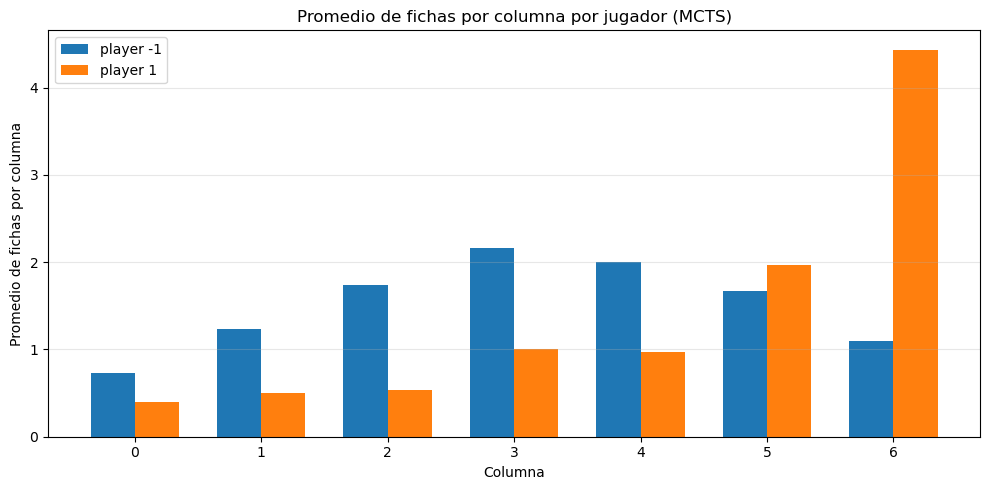

In [13]:

# Config
N_games = 30
agent_name = "Tercera versión"
opponent_name = "Primera versión"

# Buscar clases
AgentClass = None
OpponentClass = None
for n, cls in players:
    if n == agent_name:
        AgentClass = cls
    if n == opponent_name:
        OpponentClass = cls

all_moves = []

for run in range(N_games):
    agent = AgentClass(); agent.mount()
    opp = OpponentClass(); opp.mount()

    state = ConnectState()
    move_idx = 0

    while not state.is_final():
        if state.player == -1:
            action = agent.act(state.board)
        else:
            action = opp.act(state.board)

        all_moves.append({
            "run": run,
            "player": int(state.player),
            "action": int(action)
        })

        state = state.transition(action)
        move_idx += 1

df = pd.DataFrame(all_moves)

COLS = 7
columns = list(range(COLS))

counts = (
    df.groupby(["run", "player", "action"])
    .size()
    .reset_index(name="count")
)

pivot = counts.pivot_table(
    index=["run", "player"],
    columns="action",
    values="count",
    fill_value=0
)

for c in columns:
    if c not in pivot.columns:
        pivot[c] = 0
pivot = pivot[columns]

avg_per_run = pivot.groupby("player").mean()

players_list = sorted(avg_per_run.index.tolist())

x = np.arange(COLS)
width = 0.35

plt.figure(figsize=(10,5))

for i, player in enumerate(players_list):
    plt.bar(
        x + (i - 0.5*(len(players_list)-1))*width,
        avg_per_run.loc[player].values,
        width=width,
        label=f"player {player}"
    )

plt.xticks(x, columns)
plt.xlabel("Columna")
plt.ylabel("Promedio de fichas por columna")
plt.title("Promedio de fichas por columna por jugador (MCTS)")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


Tiende a ocupar más las centrales, prueba de que la implementación de center_score está funcionando correctamente